In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns


In [3]:
file_path = r"C:\Users\Wsiwale\Desktop\Dataset\LCDataDictionary_loan\loan\loan.csv"
df = pd.read_csv(file_path)

C:\Users\wsiwale-t2\AppData\Local\Temp\ipykernel_2672\2768999735.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [7]:
print(df.isnull().sum())

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64


In [8]:
print(df.dtypes)

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object


In [9]:
df = df.drop_duplicates()
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [10]:
print(df.isnull().sum())

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64


In [11]:
# filling NaN values numerical vales with median and categorical with mode
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

#fill missing valuses with numerical columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#fill missing values for categorical columns with mode(most frequent values)
df[categorical_cols] = df[categorical_cols].apply(lambda x:  x.fillna(x.mode()[0]))

print("Missing values Handles successfully!")

Missing values Handles successfully!


In [12]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,17100.0,0.0,0.0,2.0
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,10200.0,0.0,0.0,2.0
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,18000.0,0.0,0.0,2.0
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,24684.5,74.9,1.0,2.0,4483.0,61.9,27000.0,0.0,0.0,2.0


In [13]:
print(df.isnull().sum())

id                  0
member_id           0
loan_amnt           0
funded_amnt         0
funded_amnt_inv     0
                   ..
all_util            0
total_rev_hi_lim    0
inq_fi              0
total_cu_tl         0
inq_last_12m        0
Length: 74, dtype: int64


In [14]:
# our target dependant variable:- 'Loan_status'
# we are going to use the decision tree algorithm for the ML

x = df.drop('loan_status', axis= 1)

In [15]:
x.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0


In [16]:
y = df['loan_status']
y

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
887374        Current
887375        Current
887376        Current
887377        Current
887378        Current
Name: loan_status, Length: 887379, dtype: object

In [17]:
 from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.8)

In [19]:
X_test

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
392508,14388231,16430625,26750.0,26750.0,26700.0,60 months,13.98,622.15,C,C3,...,24684.5,74.9,1.0,2.0,4483.0,61.9,51100.0,0.0,0.0,2.0
743223,49654041,52982769,12000.0,12000.0,12000.0,36 months,13.33,406.24,C,C3,...,24684.5,74.9,1.0,2.0,4483.0,61.9,10200.0,0.0,0.0,2.0
781719,44503868,47571626,21000.0,21000.0,21000.0,36 months,14.65,724.38,C,C5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,57100.0,0.0,0.0,2.0
231932,37800954,40563856,21675.0,21675.0,21425.0,60 months,17.14,540.32,D,D4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,24800.0,0.0,0.0,2.0
186543,1687075,1969377,4800.0,4800.0,4800.0,36 months,14.33,164.83,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,70400.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148015,4277628,5460040,14000.0,14000.0,14000.0,36 months,15.31,487.45,C,C2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,20600.0,0.0,0.0,2.0
116163,6188519,7660657,20000.0,20000.0,20000.0,60 months,20.31,533.34,D,D5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,100500.0,0.0,0.0,2.0
424274,12997103,15029286,15350.0,15350.0,15350.0,36 months,15.61,536.71,C,C5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,12300.0,0.0,0.0,2.0
11051,821938,1030335,13600.0,13600.0,13600.0,60 months,16.89,337.20,D,D4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,23700.0,0.0,0.0,2.0


In [20]:
X_train

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
722702,51376852,54786579,10000.0,10000.0,10000.0,36 months,9.17,318.79,B,B2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,32500.0,0.0,0.0,2.0
745034,49473138,52791853,24200.0,24200.0,24200.0,60 months,18.55,621.79,E,E2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,40200.0,0.0,0.0,2.0
825164,42031240,44987955,5600.0,5600.0,5600.0,36 months,12.29,186.78,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,32700.0,0.0,0.0,2.0
288764,29775281,32328511,13925.0,13925.0,13925.0,36 months,7.69,434.38,A,A4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,50900.0,0.0,0.0,2.0
547417,63496569,67839324,28000.0,28000.0,28000.0,36 months,7.26,867.90,A,A4,...,24684.5,74.9,1.0,2.0,4483.0,61.9,50100.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441954,11905328,13897478,8400.0,8400.0,8400.0,36 months,8.90,266.73,A,A5,...,24684.5,74.9,1.0,2.0,4483.0,61.9,14000.0,0.0,0.0,2.0
461936,10073021,11924258,7000.0,7000.0,7000.0,36 months,13.98,239.18,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,158000.0,0.0,0.0,2.0
285158,30185686,32728892,27975.0,27975.0,27975.0,60 months,10.15,596.46,B,B2,...,24684.5,74.9,1.0,2.0,4483.0,61.9,59200.0,0.0,0.0,2.0
680224,55421259,59022976,14225.0,14225.0,14200.0,36 months,12.29,474.45,C,C1,...,24684.5,74.9,1.0,2.0,4483.0,61.9,26500.0,0.0,0.0,2.0


In [21]:
X_train.shape

(177475, 73)

In [22]:
X_test.shape

(709904, 73)

In [23]:
 from sklearn.tree import DecisionTreeClassifier

In [24]:
print(X_train.head())

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
722702  51376852   54786579    10000.0      10000.0          10000.0   
745034  49473138   52791853    24200.0      24200.0          24200.0   
825164  42031240   44987955     5600.0       5600.0           5600.0   
288764  29775281   32328511    13925.0      13925.0          13925.0   
547417  63496569   67839324    28000.0      28000.0          28000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
722702   36 months      9.17       318.79     B        B2  ...      24684.5   
745034   60 months     18.55       621.79     E        E2  ...      24684.5   
825164   36 months     12.29       186.78     C        C1  ...      24684.5   
288764   36 months      7.69       434.38     A        A4  ...      24684.5   
547417   36 months      7.26       867.90     A        A4  ...      24684.5   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
722702    74

In [25]:
print(X_train.dtypes)

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 73, dtype: object


In [26]:
print(X_train.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', '

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_py...
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

These imports bring in:
1. Import Statements
ColumnTransformer: Apply different preprocessing to different column types (e.g., numeric vs. categorical).
Pipeline: Bundle preprocessing and modeling together into one object.
OneHotEncoder: Convert categorical variables to binary indicators.
DecisionTreeClassifier: The classification model used here.

2. Identify Column Types
cat_cols: All columns with text (i.e., categorical features).
num_cols: All numerical features.

 3. Create Preprocessor
This tells scikit-learn how to preprocess your data:
Categorical columns (cat_cols) ➝ OneHotEncoder
Converts text labels into binary vectors.
handle_unknown='ignore' means if a new category appears in test data, it won't break.
Numerical columns (num_cols) ➝ 'passthrough'
Just pass them without changing anything.

4. Build the Pipeline
Now you're chaining:
Preprocessing (preprocessor)
Training the classifier (DecisionTreeClassifier)
Everything is combined into a single object clf.

 5. Train the Pipeline
This fits the entire pipeline:
First preprocesses X_train (categorical ➝ one-hot, numerical ➝ passthrough).
Then fits a Decision Tree using the transformed data and target Y_train.




In [28]:
Y_pred = model.predict(X_test) 
Y_pred

array(['Current', 'Current', 'Fully Paid', ..., 'Charged Off',
       'Late (31-120 days)', 'Current'], dtype=object)

In [29]:
Y_test

392508               Current
743223               Current
781719            Fully Paid
231932               Current
186543            Fully Paid
                 ...        
148015            Fully Paid
116163               Current
424274           Charged Off
11051     Late (31-120 days)
680672               Current
Name: loan_status, Length: 709904, dtype: object

In [30]:
from sklearn import metrics

In [32]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9824117063715657


In [37]:
X_train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', '

In [40]:
color_pal = sns.color_palette()

In [42]:
y

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
887374        Current
887375        Current
887376        Current
887377        Current
887378        Current
Name: loan_status, Length: 887379, dtype: object

C:\Users\wsiwale-t2\AppData\Local\Temp\ipykernel_2672\980710297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='grade', y='int_rate', palette='Set2')


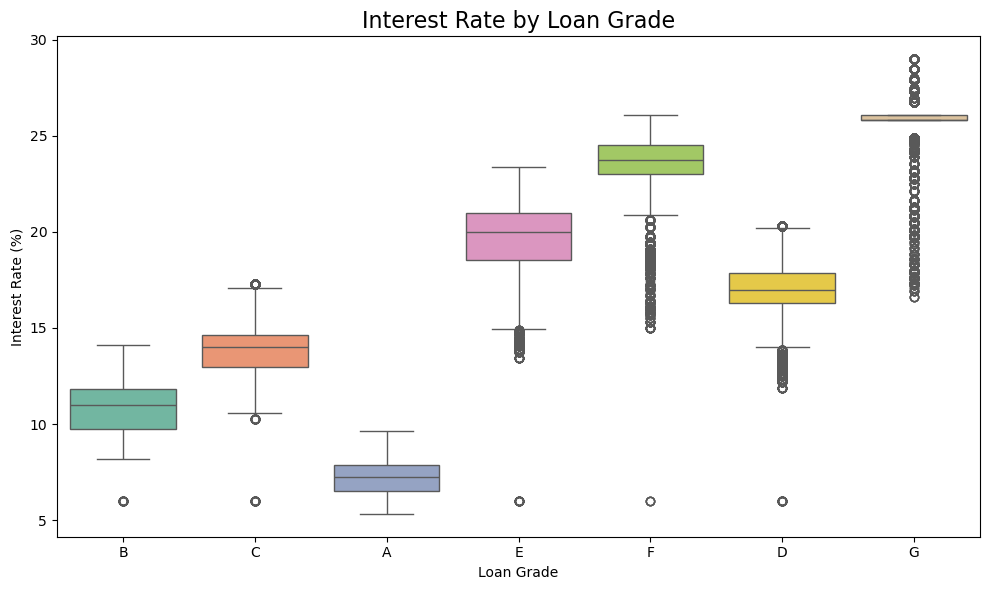

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grade', y='int_rate', palette='Set2')
plt.title('Interest Rate by Loan Grade', fontsize=16)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

C:\Users\wsiwale-t2\AppData\Local\Temp\ipykernel_2672\533499358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sub_grade', y='int_rate', palette='Spectral')


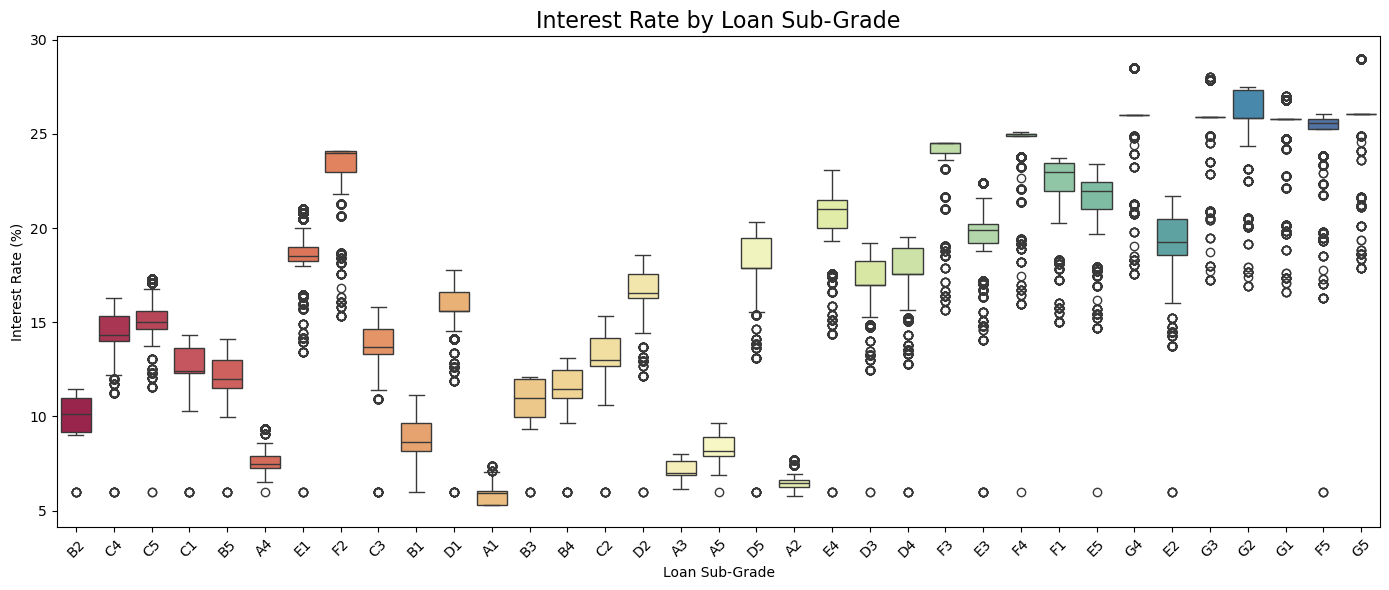

In [70]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='sub_grade', y='int_rate', palette='Spectral')
plt.title('Interest Rate by Loan Sub-Grade', fontsize=16)
plt.xlabel('Loan Sub-Grade')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

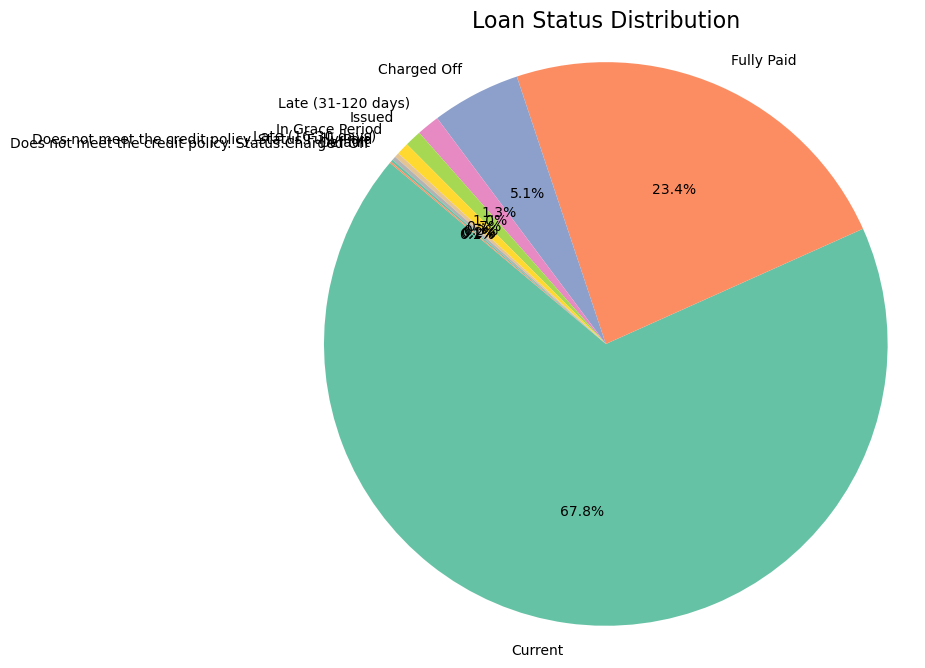

In [73]:
import matplotlib.pyplot as plt

# Count values in 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Loan Status Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: title={'center': 'Loan Status Distribution'}, xlabel='loan_status'>

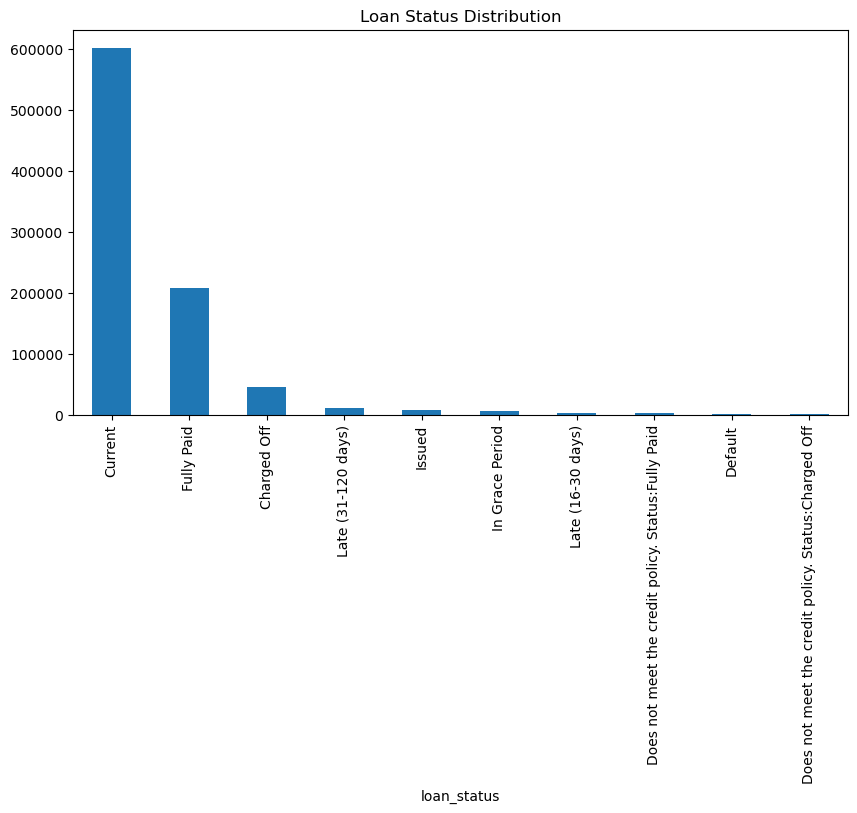

In [43]:
y.value_counts().plot(kind='bar', figsize=(10, 5), color=color_pal[0], title='Loan Status Distribution')

C:\Users\wsiwale-t2\AppData\Local\Temp\ipykernel_2672\3126590288.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_status = df_clean.resample('M', on='issue_d')['loan_status'].value_counts(normalize=True).unstack().fillna(0)


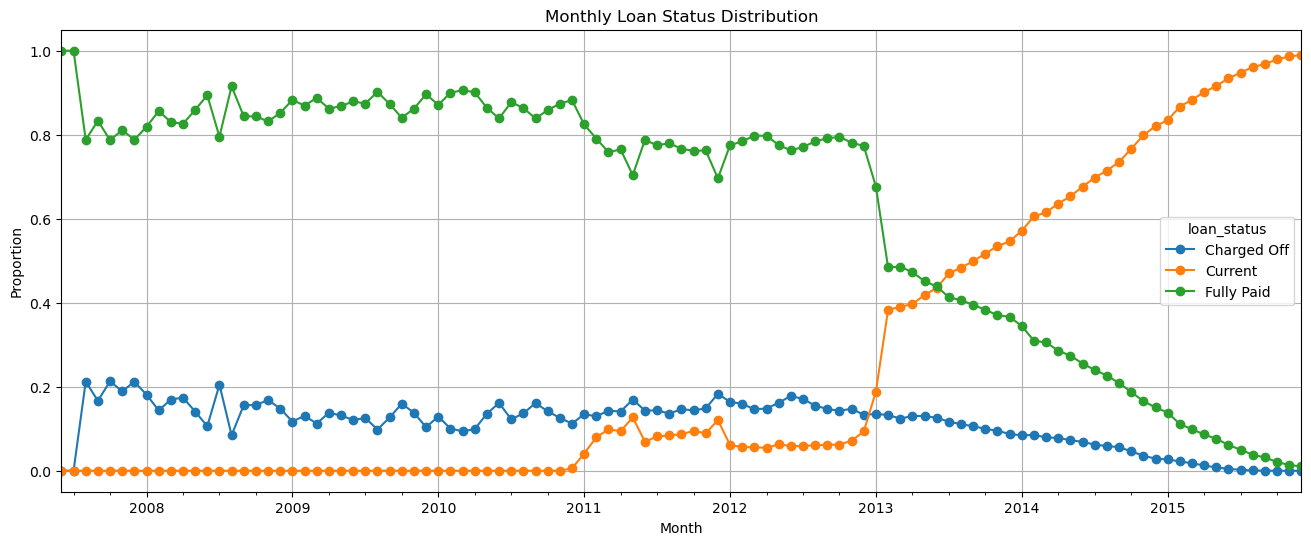

In [65]:
monthly_status = df_clean.resample('M', on='issue_d')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

monthly_status.plot(figsize=(16, 6), marker='o')
plt.title('Monthly Loan Status Distribution')
plt.ylabel('Proportion')
plt.xlabel('Month')
plt.grid(True)
plt.show()

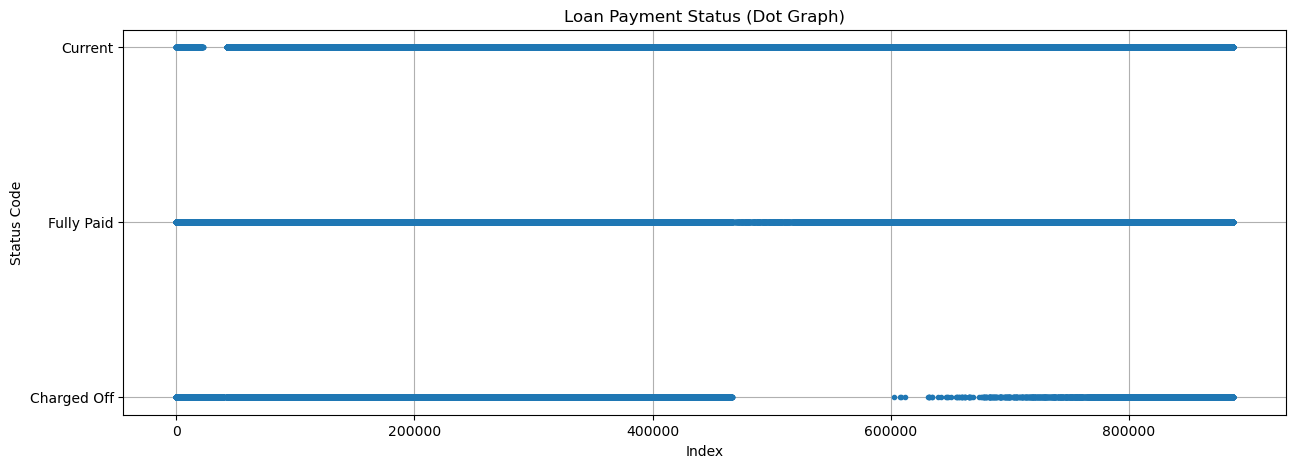

In [66]:
plt.figure(figsize=(15, 5))
plt.plot(y_numeric.index, y_numeric.values, '.', color=color_pal[0])  # dot style
plt.title('Loan Payment Status (Dot Graph)')
plt.xlabel('Index')
plt.ylabel('Status Code')
plt.yticks([0, 1, 2], ['Charged Off', 'Fully Paid', 'Current'])
plt.grid(True)
plt.show()

In [55]:
df.head

<bound method NDFrame.head of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0           4975.0   
1        1077430    1314167     2500.0       2500.0           2500.0   
2        1077175    1313524     2400.0       2400.0           2400.0   
3        1076863    1277178    10000.0      10000.0          10000.0   
4        1075358    1311748     3000.0       3000.0           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635    10000.0      10000.0          10000.0   
887375  36441262   39152692    24000.0      24000.0          24000.0   
887376  36271333   38982739    13000.0      13000.0          13000.0   
887377  36490806   39222577    12000.0      12000.0          12000.0   
887378  36271262   38982659    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
0        36 months     10.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')

# Map statuses to numbers for plotting
status_map = {'Charged Off': 0, 'Fully Paid': 1, 'Current': 2}
df['loan_status_code'] = df['loan_status'].map(status_map)

# Drop any rows with missing issue date or unmapped status
df_clean = df.dropna(subset=['issue_d', 'loan_status_code'])

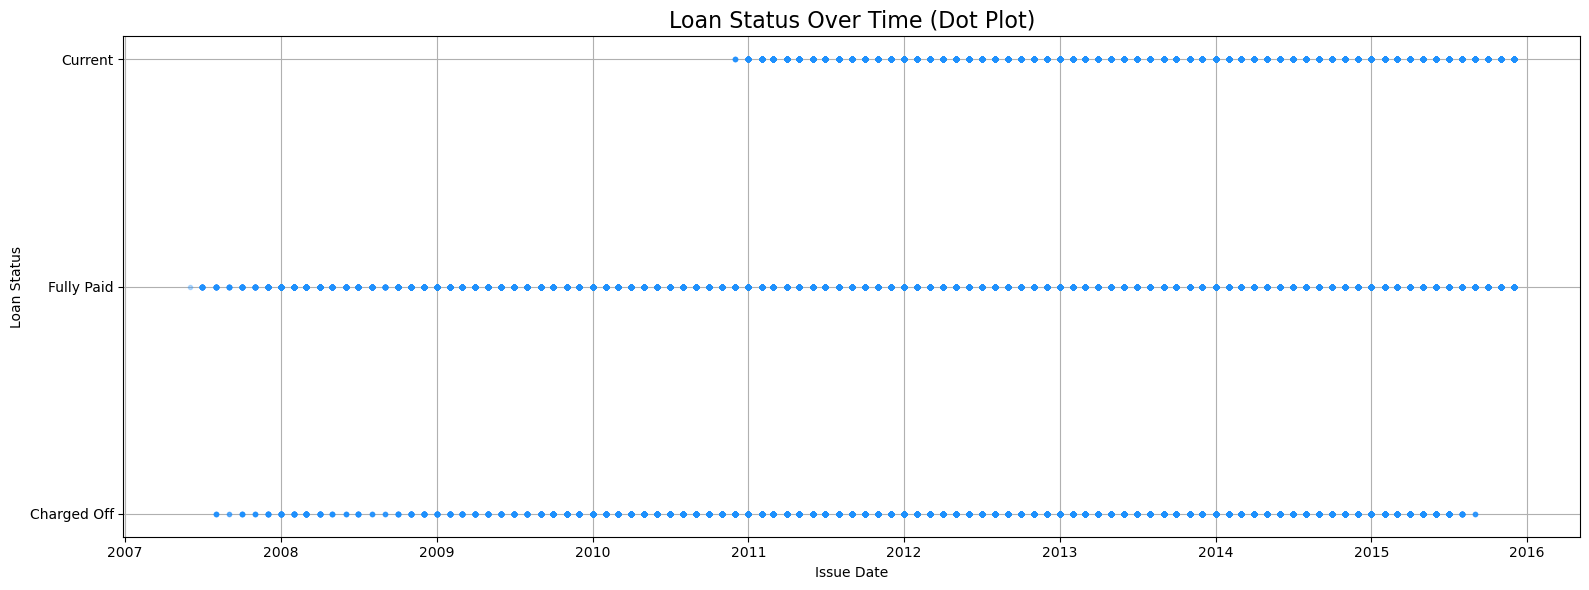

In [57]:
plt.figure(figsize=(16, 6))
plt.plot(df_clean['issue_d'], df_clean['loan_status_code'], '.', alpha=0.3, color='dodgerblue')

plt.title('Loan Status Over Time (Dot Plot)', fontsize=16)
plt.xlabel('Issue Date')
plt.ylabel('Loan Status')
plt.yticks([0, 1, 2], ['Charged Off', 'Fully Paid', 'Current'])
plt.grid(True)
plt.tight_layout()
plt.show()

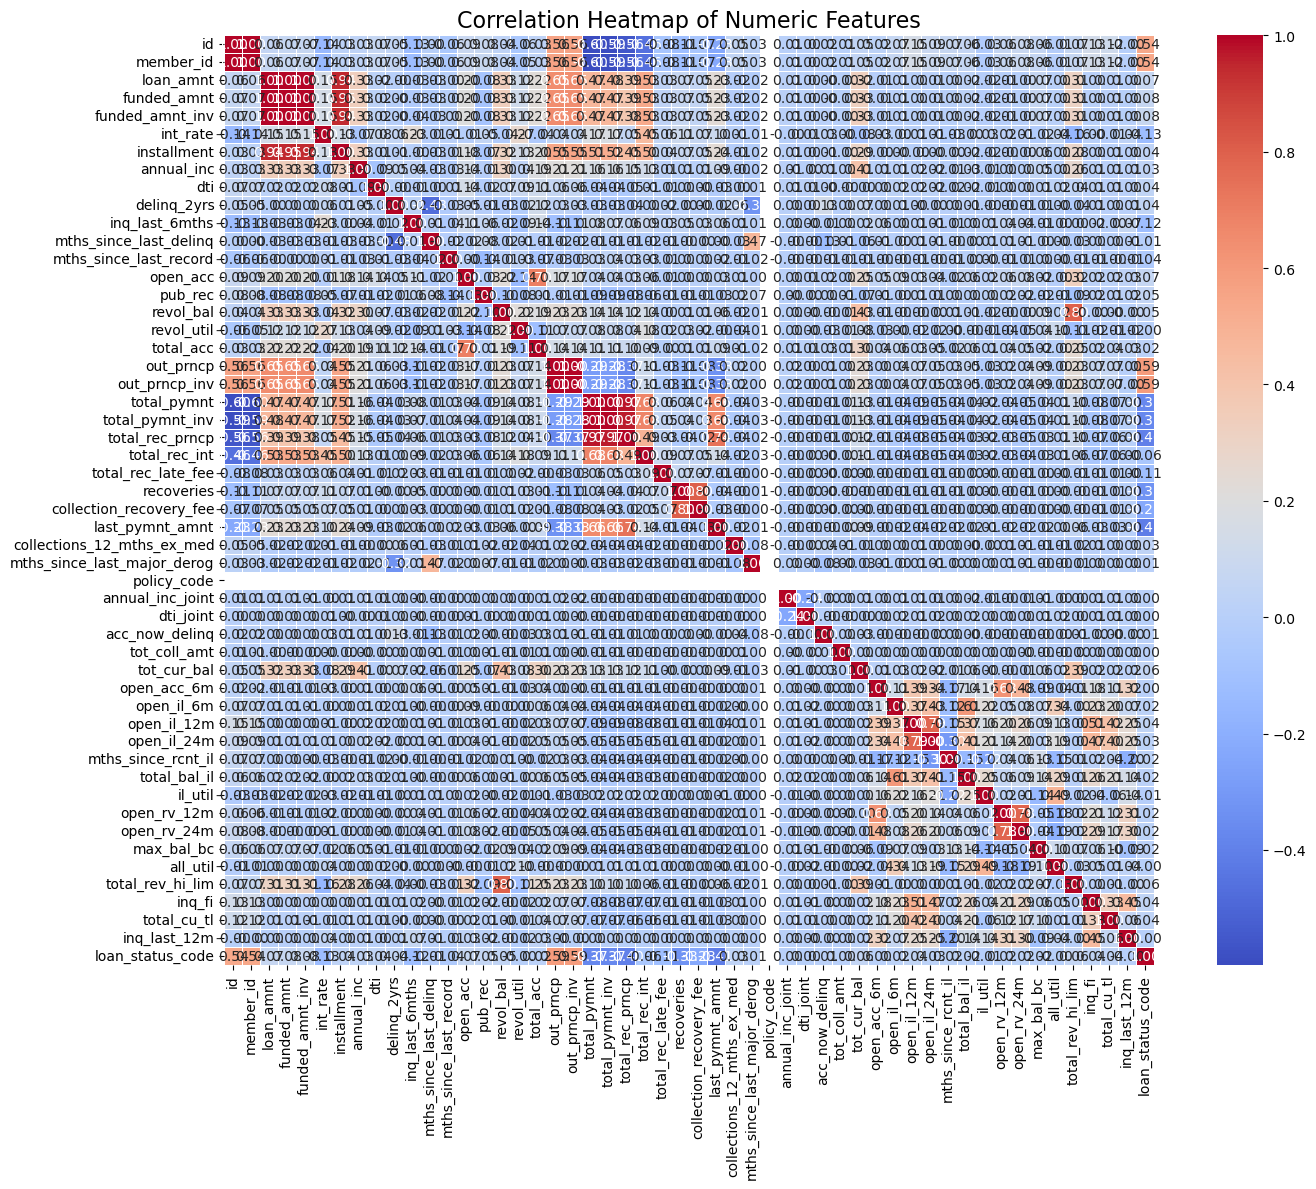

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset if not already loaded
# df = pd.read_csv('your_loan_data.csv')

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)

# Show plot
plt.tight_layout()
plt.show()